# Application Flow

**Before proceeding with the algorithm, let's first discuss the lifecycle of an unsupervises machine learning model. This diagram explains the creation of an unsupervised Machine Learning model from scratch and then taking the same model further with hyperparameter tuning to increase its accuracy, deciding the deployment strategies for that model and once deployed setting up the logging and monitoring frameworks to generate reports and dashboards based on the client requirements. A typical lifecycle diagram for an unsupervised machine learning model looks like:**

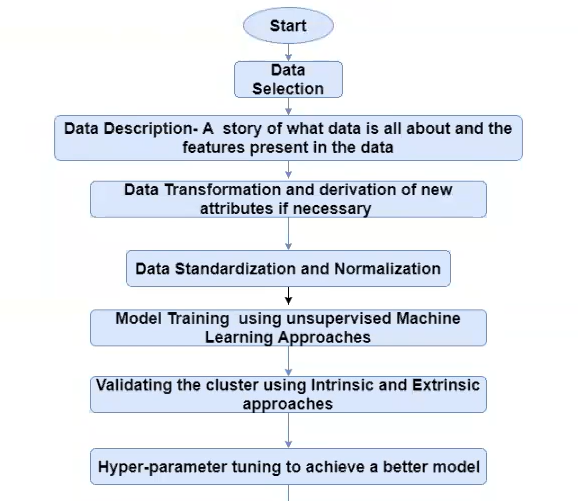

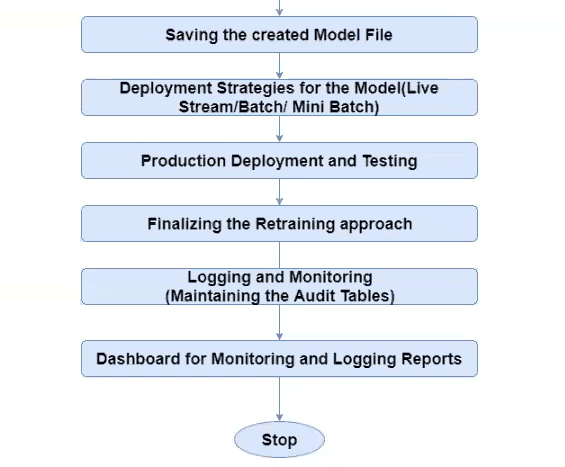

# Clustering

Let's suppose we give a child different objects to group. How does a child make a group? The child may group over the colour, over the shape, over the hardness or softness of the objects etc. The basic idea here is that the child tries to find out similarities and dissimilarities between different objects and then tries to make a group of similar objects. This is called clustering, the method of identifying similar instances and keeping them together. In Other words, clustering identifies homogeneous subgroups among the observations.

Clustering is an unsupervised approach which finds a structure/pattern in a collection of unlabeled data. A cluster is a collection of objects which are "similar" amongst themselves and are "dissimilar" to the objects belonging to a different cluster. For example:

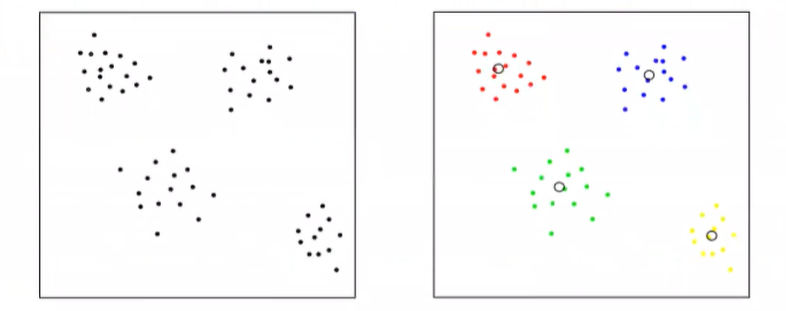

In the figure above, we can easily identify 4 different clusters. The clustering criteria here is distance. Whichever points are near to each other are kept in the same cluster and the faraway points belong to a different cluster

### The Goal of Clustering

The goal of clustering is to determine the intrinsic groups in unlabeled data. The question is: what constitutes a good cluster? It can be shown that there is no absolute "best" criterion for cluster validation. Consequently, it is the user who must supply the criterion for validating the cluster. For example, we might be interested in finding representatives of homogeneous instances for finding the "natural clusters" and identifying their unknown properties (like "natural" data types), for finding appropriate groupings or in finding unusual (which are different from all other data) data objects (outlier detection).

# Applications

**The scikit-learn book describes the various applications of clustering as follows:**

- **For customer segmentation:** You can cluster your customers based on their purchases, their activity on your website, and so on. This is useful to understand who your customers are and what they need, so you can adapt your products and marketing campaigns to each segment. For example, this can be useful in recommender systems to suggest content that other users in the same cluster enjoyed.

- **For data analysis:** When analyzing a new dataset, it is often useful to first discover clusters of similar instances, as it is often easier to analyze clusters separately.

- **As a dimensionality reduction technique:** Once a dataset has been clustered, it is usually possible to measure each instance's affinity with each cluster (affinity is any measure of how well an instance fits into a cluster). Each instance's feature vector x can then be replaced with the vector of its cluster affinities. If there are k clusters, then this vector is k dimensional. This is typically much lower dimensional than the original feature vector, but it can preserve enough information for further processing.

- **For anomaly detection (also called outlier detection):** Any instance that has a low affinity to all the clusters is likely to be an anomaly. For example, if you have clustered the users of your website based on their behavior, you can detect users with unusual behavior, such as an unusual number of requests per second, and so on. Anomaly detection is particularly useful in detecting defects in manufacturing, or for fraud detection.

- **For semi-supervised learning:** If you only have a few labels, you could perform clustering and propagate the labels to all the instances in the same cluster. This can greatly increase the amount of labels available for a subsequent supervised learning algorithm, and thus improve its performance.

- **For search engines:** For example, some search engines let you search for images that are similar to a reference image. To build such a system, you would first apply a clustering algorithm to all the images in your database: similar images would end up in the same cluster. Then when a user provides a reference image, all you need to do is to find this image's cluster using the trained clustering model, and you can then simply return all the images from this cluster.

- **To segment an image:** By clustering pixels according to their color, then replacing each pixel's color with the mean color of its cluster, it is possible to reduce the number of different colors in the image considerably. This technique is used in many object detection and tracking systems, as it makes it easier to detect the contour of each object.

## Main Requirements:
The primary requirements that should be met by a clustering algorithm are:
- It should be scalable
- It should be able to deal with attributes of different types;
- It should be able to discover arbitrary shape clusters;
- It should have an inbuilt ability to deal with noise and outliers;
- The clusters should not vary with the order of input records; It should be able to handle data of high dimensions.
- It should be easy to interpret and use.

## Approaches for Clustering:
The clustering approaches can be broadly divided into two categories: Agglomerative and Divisive.

**Agglomerative:** This approach first considers all the points as individual clusters and then finds out the similarity between two points, puts them into a cluster. Then it goes on finding similar points and clusters until there is only one cluster left i.e., all points belong to a big cluster. This is also called the bottom-up approach.

**Divisive:** It is opposite of the agglomerative approach. It first considers all the points to be part of one big cluster and in the subsequent steps tries to find out the points/ clusters which are least similar to each other and then breaks the bigger cluster into smaller ones. This continues until there are as many clusters as there are datapoints. This is also called the top-down approach.

## ________________________K-Means Clustering_______________________
It was proposed by Stuart Lloyd at the Bell Labs in 1957 as a technique for pulse-code modulation, but it was only published outside of the company in 1982, in a paper titled "Least square quantization in PCM". By then, in 1965, Edward W. Forgy had published virtually the same algorithm, so K-Means is sometimes referred to as Lloyd-Forgy.
K-Means is a clustering approach in which the data is grouped into K distinct non-overlapping clusters based on their distances from the K centres. The value of K needs to be specified first and then the algorithm assigns the points to exactly one cluster.

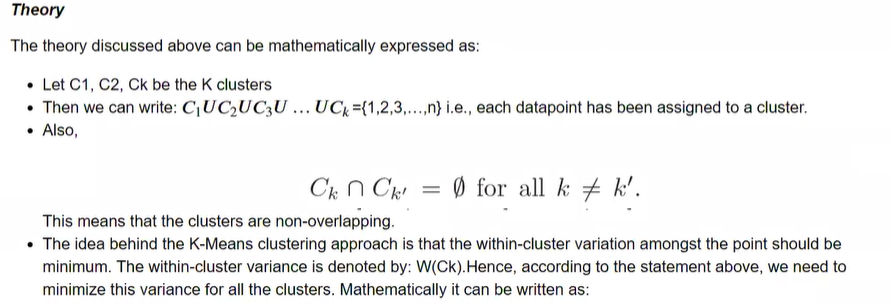
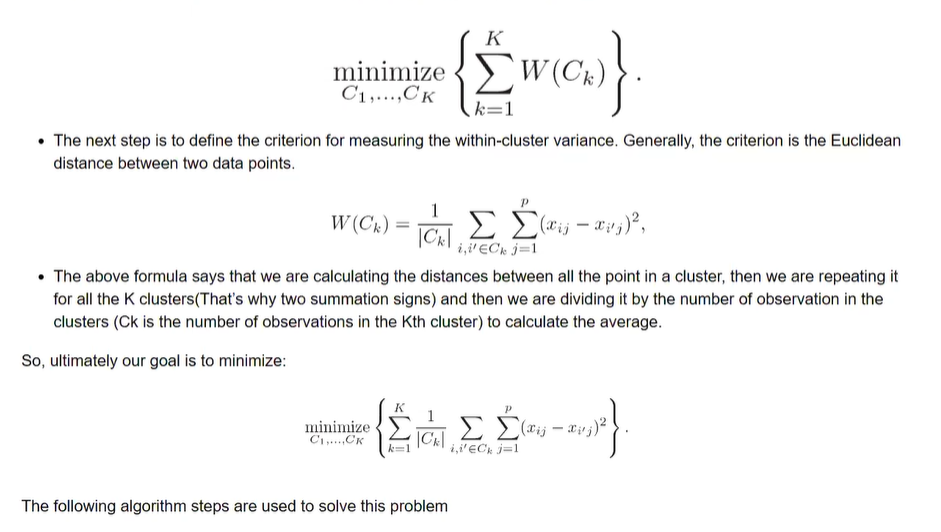

## Algorithm:
1. Randomly assign K centres.
2. Calculate the distance of all the points from all the K centres and allocate the points to cluster based on the shortest distance. The model's inertia is the mean squared distance between each instance and its closest centroid. The goal is to have a model with the lowes intertia.
3. Once all the points are assigned to clusters, recompute the centroids.
4. Repeat the steps 2 and 3 until the locations of the centroids stop changing and the cluster allocation of the points becomes constant.

# Python Explanation:
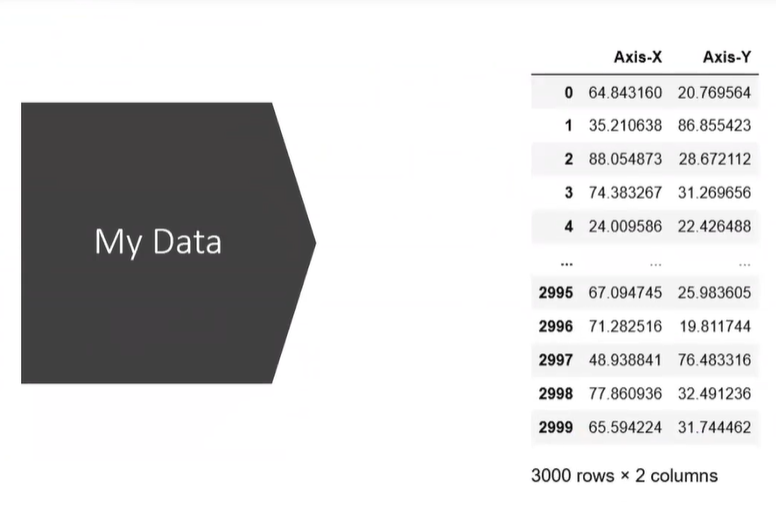

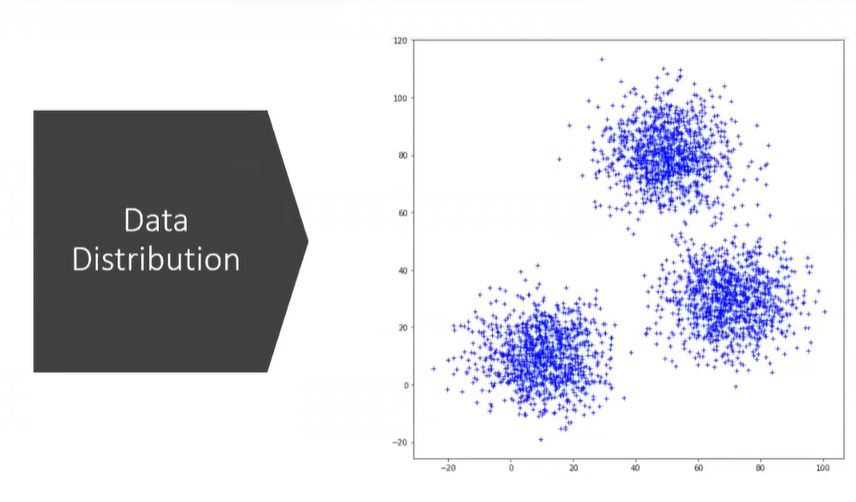
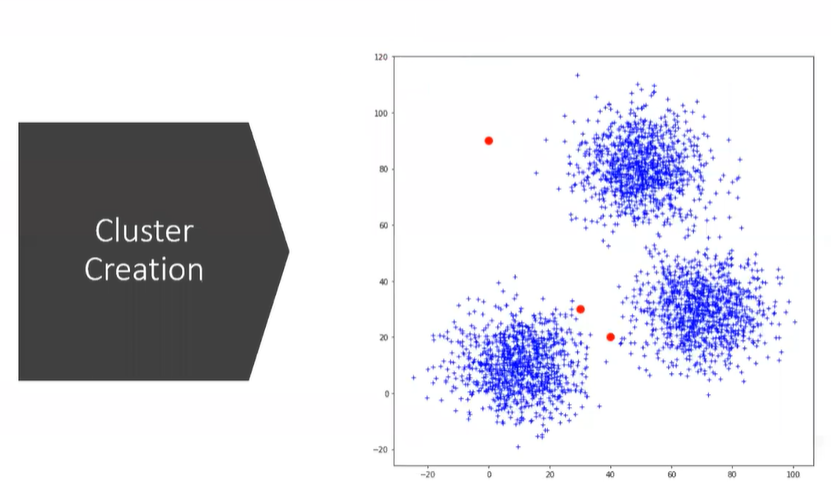

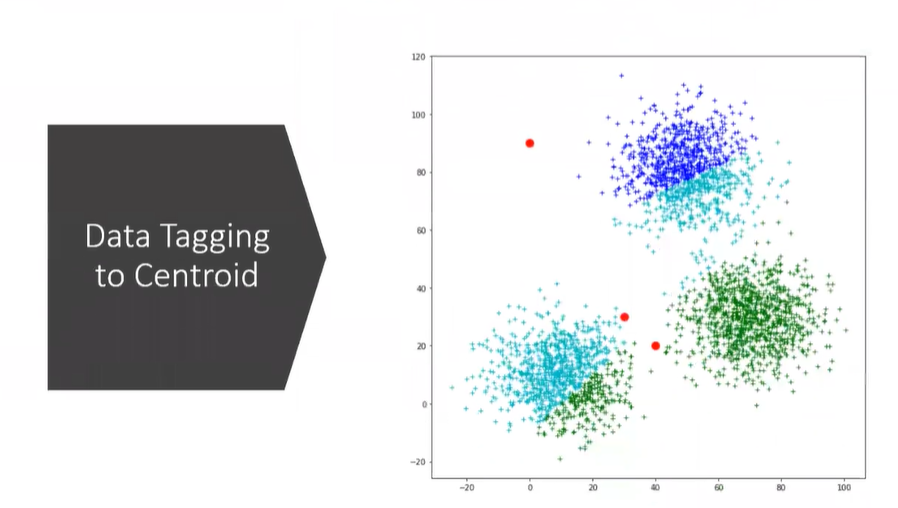
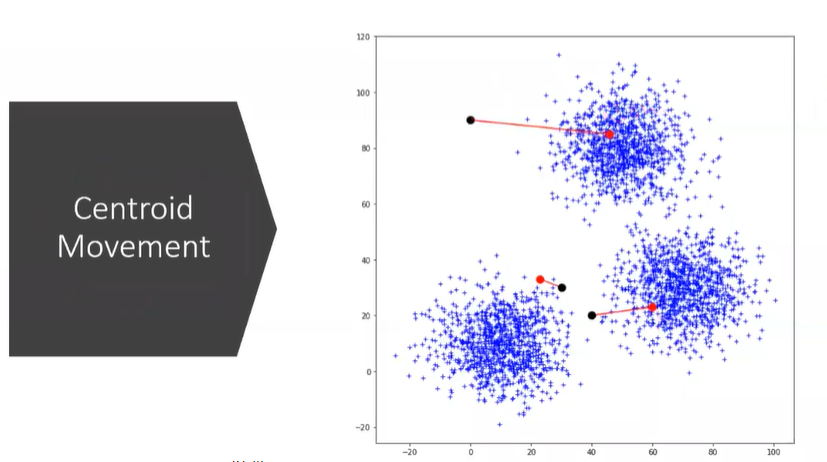

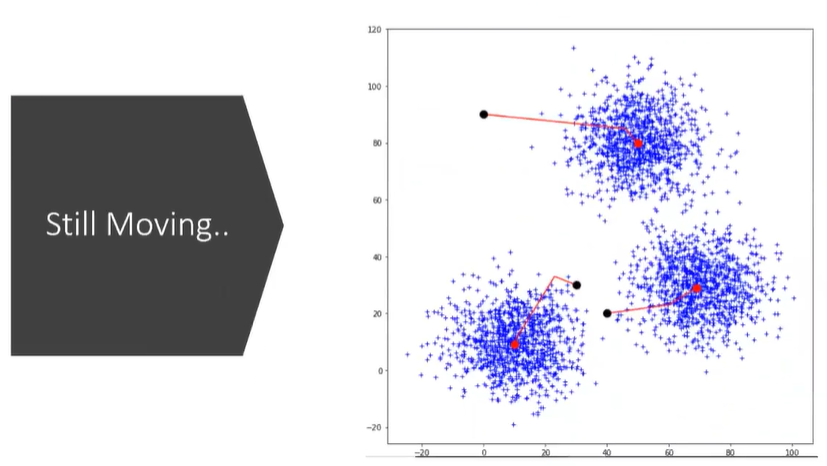
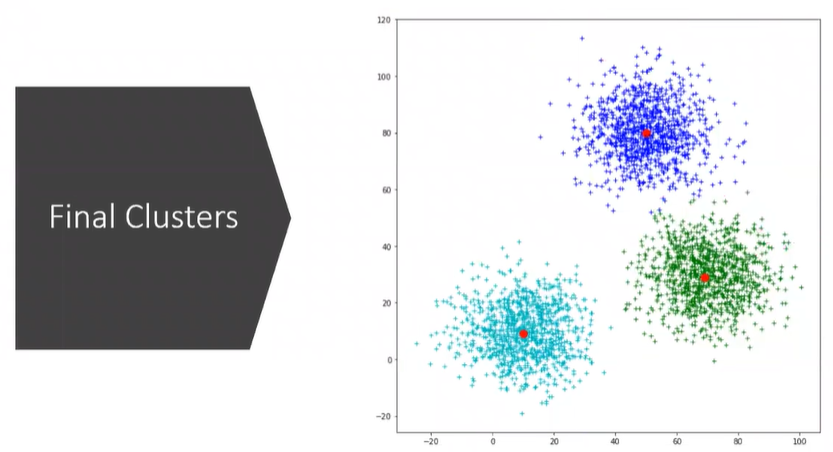

The diagram above shows the step by step implementation of the K-Means algorithm.

As we saw earlier, we need to provide the value of K beforehand. But the question is how to get a good value of K. An optimum value of K is obtained using the Elbow Method.

**The Elbow-Method**
This method is based on the relationship between the within-cluster sum of squared distances(WCSS Or Inertia) and the number of clusters. It is observed that first with an increase in the number of clusters WCSS decreases steeply and then after a certain number of clusters the drop in WCSS is not that prominent. The point after which the graph between WCSS and the number of clusters becomes comparatively smother is termed as the elbow and the number of cluster at that point are the optimum number of clusters as even after increasing the clusters after that point the variation is not decreasing by much i.e., we have accounted for almost all the dissimilarity in the data. An elbow-curve looks like:
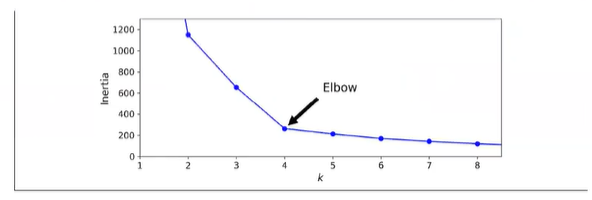

# An example with actual data

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
dataset = pd.read_csv('Mall_Customers.csv')

In [5]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
#dataset
X = dataset[['Annual Income (k$)','Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


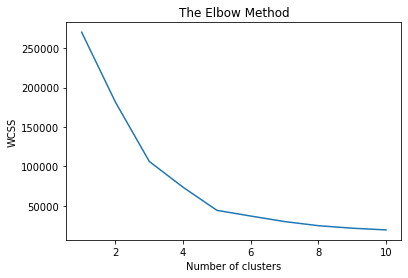

In [12]:
# Elbow method

from sklearn.cluster import KMeans

wcss = []
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [30]:
# Fitting K-Means to the dataset

kmeans = KMeans (n_clusters = 5, random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


# Model Evaluation

**Just like in supervised Learning we have a metric in unsupervised learning as well**

In [32]:
from sklearn.metrics import silhouette_score

In [33]:
silhouette_score(X,y_kmeans)

0.553931997444648

### Sample prediction

In [34]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [35]:
# It predicts the cluster number to which the datapoint belongs to

test=kmeans.predict(np.asarray([[15,81]]))
test[0]

3

In [36]:
# Keep same cluster customers in seperate dataset
cluster_4_customers = dataset[y_kmeans==4]
print (cluster_4_customers)

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
123         124    Male   39                  69                      91
125         126  Female   31                  70                      77
127         128    Male   40                  71                      95
129         130    Male   38                  71                      75
131         132    Male   39                  71                      75
133         134  Female   31                  72                      71
135         136  Female   29                  73                      88
137         138    Male   32                  73                      73
139         140  Female   35                  74                      72
141         142    Male   32                  75                      93
143         144  Female   32                  76                      87
145         146    Male   28                  77                      97
147         148  Female   32                  77   

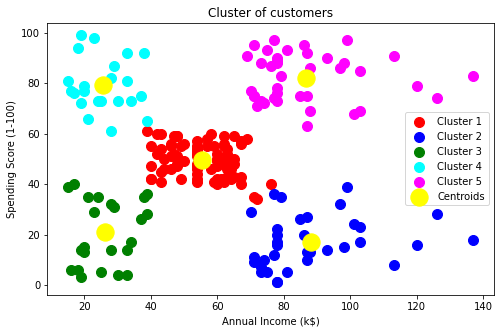

In [37]:
# Visualising the clusters

plt.figure(figsize=(8,5))
plt.scatter(X[y_kmeans == 0]['Annual Income (k$)'], X[y_kmeans == 0]['Spending Score (1-100)'], s = 100, c = 'red', label = 'Cluster 1')

plt.scatter(X[y_kmeans == 1]['Annual Income (k$)'], X[y_kmeans == 1]['Spending Score (1-100)'], s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(X[y_kmeans == 2]['Annual Income (k$)'], X[y_kmeans == 2]['Spending Score (1-100)'], s = 100, c = 'green', label = 'Cluster 3')

plt.scatter(X[y_kmeans == 3]['Annual Income (k$)'], X[y_kmeans == 3]['Spending Score (1-100)'], s = 100, c = 'cyan', label = 'Cluster 4')

plt.scatter(X[y_kmeans == 4]['Annual Income (k$)'], X[y_kmeans == 4]['Spending Score (1-100)'], s = 100, c = 'magenta', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s = 300, c = 'yellow', label = 'Centroids')

plt.title('Cluster of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [38]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

##### Challenges and improvements in K-Means:

1. We need to specify the number of clusters beforehand.
2. It is required to run the algorithm multiple times to avoid a sub-optimal solution
3. K-Means does not behave very well when the clusters have varying sizes, different densities, or non-spherical shapes. 4. The clusters sometimes vary based on the initial choice of the centroids. An important improvement to the K-Means algorithm, called **K-Means++**, was proposed in a 2006 paper by David Arthur and Sergei Vassilvitskii. They introduced a smarter initialization step that tends to select centroids that are distant from one another, and this makes the K-Means algorithm much less likely to converge to a suboptimal solution.
5. Another important improvement to the K-Means algorithm was proposed in a 2003 paper by Charles Elkan.It considerably accelerates the algorithm by avoiding many unnecessary distance calculations: this is achieved by exploiting the triangle inequality (i.e., the straight line is always the shortest; in a triangle with sides a,b and c=> **a+b>c**) and by keeping track of lower and upper bounds for distances between instances and centroids.
6. Yet another important variant of the K-Means algorithm was proposed in a 2010 paper by David Sculley. Instead of using the full dataset at each iteration, the algorithm is capable of using **mini-batches**, moving the centroids just slightly at each iteration. This speeds up the algorithm typically by a factor of 3 or 4 and makes it possible to cluster huge datasets that do not fit in memory. Scikit-Learn implements this algorithm in the **MiniBatchKMeans** class. You can just use this class like the KMeans class:

In [39]:
# MiniBatchKMeans

from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit_predict(X)

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3,
       4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])